Import the needed Libraries

In [297]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
from sklearn.preprocessing import LabelEncoder

import sklearn as sk
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# Step 1: Data Cleaning

Reading the data of both CSV files

In [298]:
df1 = pd.read_csv('survey.csv')
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [299]:
df2 = pd.read_csv('steps.csv', sep=';') #to make the semicolon the default delimiter instead of the comma

df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merge the two datasets with a common identifier

In [300]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


As there are weights of 6 kg, it is realistic to removing the values of the weight which do not make sense
In this case we will remove weights of  40 kilograms and below, and higher than 150 kg

In [302]:
df = df[df['weight'] >= 40] #all values of weight less than 40kgs are removed from the dataframe
df = df[df['weight'] < 150]

#df = df.drop(df[(df['weight'] >= 40) & (df['weight'] <= 150)].index)
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,921.000000,921.000000,921.000000,920.000000,921.000000,24.000000,240.000000,275.000000,292.000000,349.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,464.136808,2.340934,2.526602,171.731522,72.143322,3642.416667,9018.937500,10880.509091,7434.308219,8082.100287,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,267.579604,1.227824,1.273304,9.021597,14.944793,3951.910368,6444.654214,6290.354387,6760.479502,5489.210679,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,45.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4364.000000,6537.500000,2726.750000,4428.000000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,464.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5664.500000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,695.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14237.500000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,149.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


Create the variable mean steps per participant

In [303]:
df['mean'] = df.loc[:,'20-6-2013':].mean(axis=1) #create a new "mean" column for the first step column to the left until the end step column
df

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6282.131868
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4799.880000
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10030.326829
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15679.679012


Let us remove all data that have mean more than 40K steps on average per day, as it won't be feasible to make more than this value in one day

In [304]:
df = df[df['mean'] <= 40000]

Additionally, let us removed the "No Degree" value from our dataframe

In [305]:
df = df[df['education_1']!='No degree']

# Step 2: Exploratory data analysis

First let us try to check the distribution plot of the heights which is the set of values of a variable, in this case the height of individuals,  and their frequency.

C:\Users\mkhammoud\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


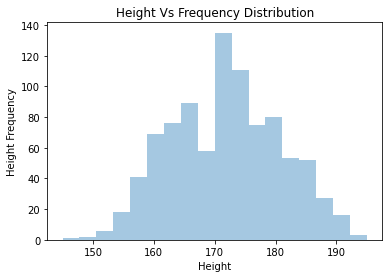

In [306]:
sns.distplot(df['height'].dropna(), kde=False) 
plt.xlabel('Height')
plt.ylabel('Height Frequency')
plt.title('Height Vs Frequency Distribution')
plt.show()

The graph looks in the range of the normal height after cleaning the un needed values, and shows a reasonabble distribution for heights. Similarly we can d the same for weight

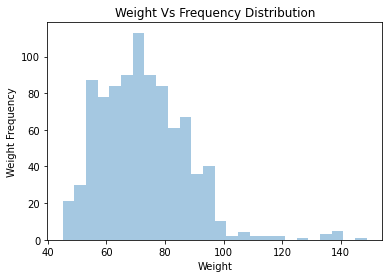

In [307]:
sns.distplot(df['weight'].dropna(), kde=False) 
plt.xlabel('Weight')
plt.ylabel('Weight Frequency')
plt.title('Weight Vs Frequency Distribution')
plt.show()

Majority of the users fall between 55 and 100 kg users, which make sense as the logical majority of people in this range. The maximum would be in the 75 kg, which also might indicate that the large number users in this weigfht range who already use such wearables could be fit in the first place.

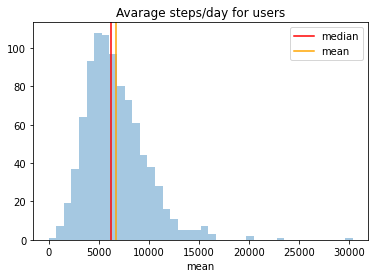

In [308]:
mean_spd = df['mean'].mean()
median_spd = df['mean'].median()

sns.distplot(df['mean'], kde=False)
plt.title('Avarage steps/day for users')
plt.axvline(median_spd, 0, 100, color='red', label='median') 
plt.axvline(mean_spd, 0, 100, color='orange', label='mean') 
plt.legend() 
plt.show()

We see that the distribution is from zero steps to around 17,000 step a day, which is also realistic. Only minority are having more than this range, which can also be feasible per day. We will not remove the highests values, taking taking 30,000 steps at this pace takes about 263 minutes (feasible in one day), as https://www.omnicalculator.com/sports/steps-to-calories

The distribution is slightly skewed to the right (tail is on the right side) as probably due that the data has a  lower bound (all data is starting from zero)

Check Mean, Median and Variance

In [309]:

print ("Mean is " + str(mean_spd))
print ("Median is " + str(median_spd))
variance = df ['mean'].var()
print ("Variance is " + str(variance))

Mean is 6711.227655668599
Median is 6237.488
Variance is 9200733.812360752


Let us check now the box plot of the mean

C:\Users\mkhammoud\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


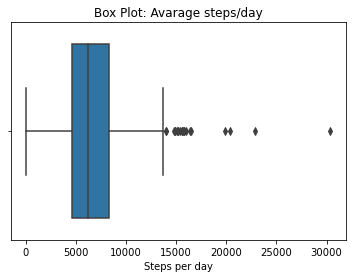

In [310]:
sns.boxplot(df ['mean'])
plt.title('Box Plot: Avarage steps/day')
plt.xlabel('Steps per day')
plt.show()

The above shows that the median is in the 6.2K range, and mean is slightly higher, around 6.7K. Majority of users make steps between 4.8 and 8K steps per day. Only few (which as visible here as point outliers) make more than 15K step a day. We will not remove those values for now as those still make sense

Text(0.5, 1.0, 'Box Plot: Gender')

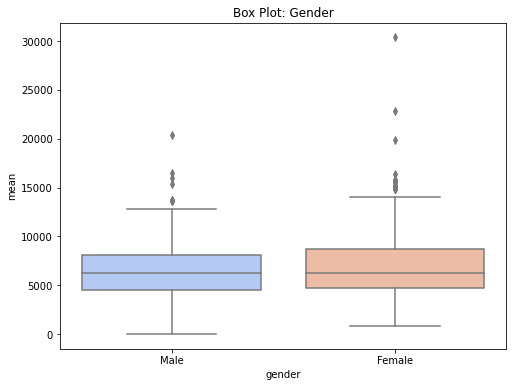

In [311]:
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='mean', data=df, palette='coolwarm')
plt.title('Box Plot: Gender')


This box plot of Gender shows that both mean and median are very similar, with female contributing more to the high values of the average steps per day than men. So we do not see such significance in the gender parameter. Lets look at the age variable

<AxesSubplot:xlabel='age', ylabel='mean'>

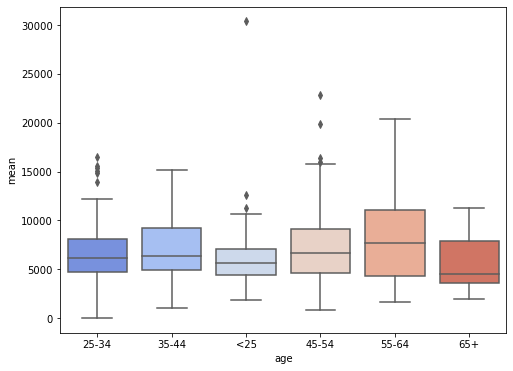

In [312]:

plt.figure(figsize=(8,6))
sns.boxplot(x='age', y='mean', data=df, palette='coolwarm')

We see that there is a great variability in age 55-64 range, and outliers in 45-54 range, and less than 25 years range. For the age less than 25, the box is shorter, so it shows that those group have high level of agreement with each other, compared to the older ages (especially 55-64) who could largely vary their daily activity compared to their age (and relative health)

Let us check now if there is any significance of the education level

<AxesSubplot:xlabel='education_1', ylabel='mean'>

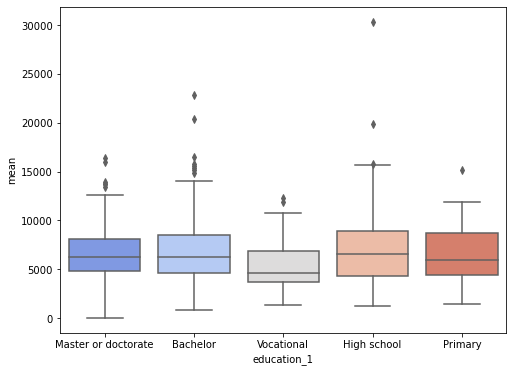

In [313]:
plt.figure(figsize=(8,6))
sns.boxplot(x='education_1', y='mean', data=df, palette='coolwarm')

We see that almost all group have similar densities, while those with Vocational training have the lowest median of users using those devices, with lower  "upper quartile" and "lower quartile" values than the other. Further investigations of other variables could be needed, as this does not show much data significance. 

Now let us check the Correlation Matrix

<AxesSubplot:>

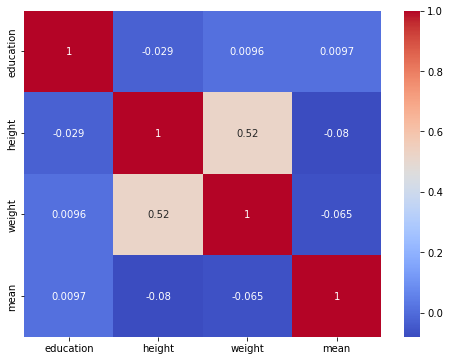

In [314]:


coursemap = df[['education', 'age' ,'height', 'weight', 'mean']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(coursemap, cmap='coolwarm', annot=True)

Apparently the weight and the height have significant correlation, as more height necessary demands a heaver weight. Other variables do not show significant correlation.

Now let us check more insights using Scatterplot

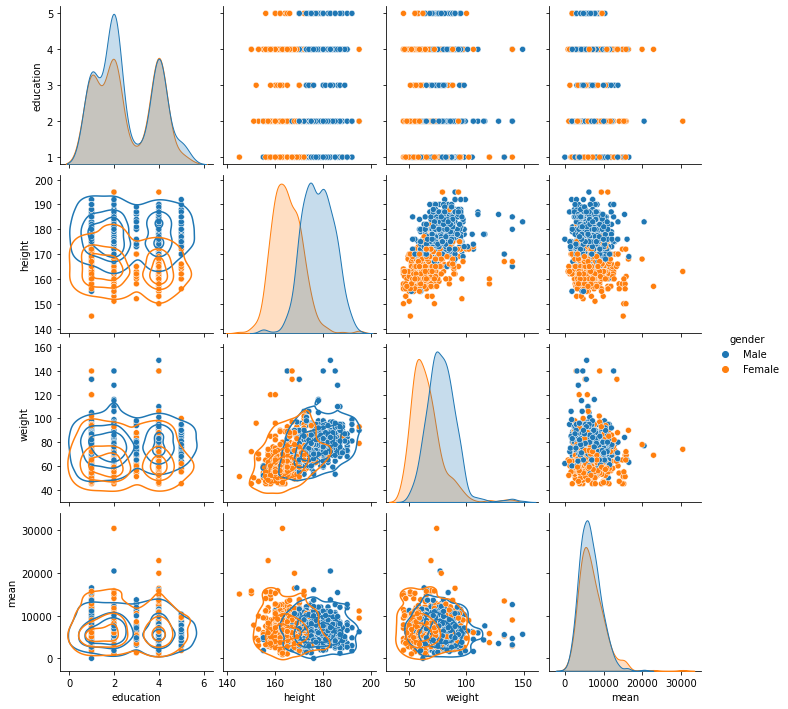

In [315]:
df1 = df[["education", "gender", "height", "weight", "mean"]]
g =sns.pairplot(df1, hue="gender", diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

There is a positive corrolation again between the height and the weight. with some scattered points on the right. There is also no much gender difference between the weight and the mean steps corrolation, as both group points are almost in the same group. There is no clear relation (nor a relation in the first place) between the education level and othe variables.

# Step 3: Predicitve Model

What is linear regression ?

It is a type of predictive analysis that assumes a linear (straigh line equation) in predicting an outcome (dependent) variable.The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = ax + b   c + b*x, where y = estimated dependent variable , b = constant, a = regression coefficient or slope, and x = score on the independent variable.

In [322]:
df.fillna(-99999, inplace=True)
df

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,-99999.0,...,4364.0,-99999.0,-99999.0,-99999.0,6227.0,4567.0,2567.0,1129.0,-99999.0,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,5312.129630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,6282.131868
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4799.880000
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,10030.326829
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,-99999.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,15679.679012


In [325]:
from sklearn.model_selection import train_test_split #this is the function we need to split the data

x = df[['height', 'weight', 'education', 'hh_size']] # include the relevant variables
y = df['mean'] #get the mean

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #splits the data into train (70%) and test (30%) data

In [326]:
lm = LinearRegression() #create a new (empty model)

lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY

In [327]:
y_test_p = lm.predict(x_test) #this is the predicted mean steps

# Step 4: Model Evaluation

In [328]:
r2_score(y_test, y_test_p) #Check the R sqaure for test data (mean and predicted mean)

0.007892704589504418

Above value of R2 is not very good, should re evaluate what columns combination need to be included

In [329]:
math.sqrt(mean_squared_error(y_test, y_test_p)) # RMSE value

3232.6618384471994